In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
from sqlalchemy import inspect

In [10]:
inspector = inspect(engine)

In [11]:
prcp_columns = inspector.get_columns("measurement")
for col in prcp_columns:
    print(col["name"],col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latest_date

'2017-08-23'

In [13]:
latest_date = dt.date(2017,8,23)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_one_year_from_latest_date = latest_date - dt.timedelta(days=365)
date_one_year_from_latest_date

# Perform a query to retrieve the date and precipitation scores
prcp_data = session.query(Measurement.date,Measurement.prcp)\
.filter(Measurement.date <= latest_date, Measurement.date >= date_one_year_from_latest_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_results = pd.DataFrame(prcp_data).set_index("date")
prcp_results

# Sort the dataframe by date
prcp_results_by_date = prcp_results.sort_values(by='date')

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_summary_stats = prcp_results.describe()
prcp_summary_stats 

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_one_year_from_latest_date = latest_date - dt.timedelta(days=365)
date_one_year_from_latest_date

# Perform a query to retrieve the date and precipitation scores
prcp_data = session.query(Measurement.date,Measurement.prcp)\
.filter(Measurement.date <= latest_date, Measurement.date >= date_one_year_from_latest_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_results = pd.DataFrame(prcp_data).set_index("date")
prcp_results
# Sort the dataframe by date
prcp_results_by_date = prcp_results.sort_values(by='date')
prcp_results_by_date

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


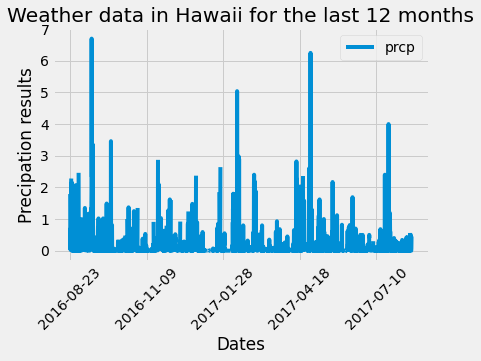

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_results = prcp_results_by_date.reset_index().plot(x='date', y='prcp')
plt.xticks(rotation = 45)
plt.title("Weather data in Hawaii for the last 12 months")
plt.xlabel('Dates')
plt.ylabel('Precipation results')
plt.show()

# Exploratory Station Analysis

In [19]:
Station_columns = inspector.get_columns("Station")

for col in Station_columns:
    print(col["name"],col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [21]:
session.query(func.count(Measurement.station)).all()

[(19550,)]

In [22]:
session.query(Measurement.station).all()

[('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC005193

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import desc
  
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()[0][0]
avg_temp

71.66378066378067

In [25]:
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()[0][0]
highest_temp

85.0

In [26]:
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()[0][0]
lowest_temp

54.0

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_query = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == most_active_station_id)\
                            .filter(Measurement.date.between(date_one_year_from_latest_date, latest_date)).all()
most_active_station_query

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [28]:

temperature_data = []

for row in most_active_station_query:
   temperature_data.append(row[1]) 
    

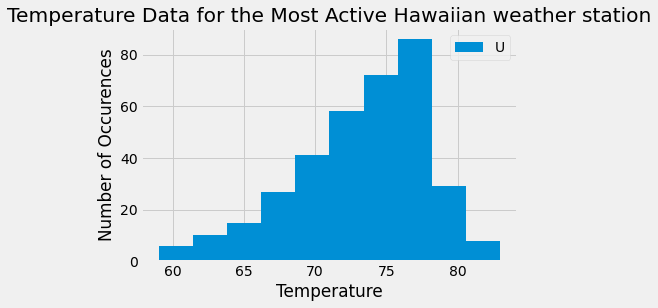

In [29]:
plt.hist(temperature_data)
plt.title("Temperature Data for the Most Active Hawaiian weather station")
plt.legend("USC00519281", loc = "best")
plt.xlabel('Temperature')
plt.ylabel('Number of Occurences')
plt.show()

# Close session

In [30]:
# Close Session
session.close()